In [22]:
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic

def see_gaps(file_name):
    with np.load(file_name) as file:
        #ic(vars(file))
        dates_str = file["dates"]
        expected_profit = file["expected_profit"]
        expected_profit_full = file["expected_profit_full"]

        gap_pct = file["gap_pct"]
        #ic(vars(file))
        #ic(expected_profit)
        #ic(gap_pct)
        idx = np.argmax(gap_pct)
        ic(file_name, expected_profit[idx], expected_profit_full[idx], gap_pct[idx], gap_pct.mean())
        
        
    plt.plot(gap_pct)
    ic(file_name, gap_pct.mean())
    

In [78]:
#file_name = "backtest_2012_all_days.npz"
#see_gaps(file_name)
#file_name = "backtest_2007_all_days.npz"
#see_gaps(file_name)
#file_name = "backtest_2018_all_days.npz"
#see_gaps(file_name)
#file_name = "backtest_2019_all_days.npz"
#see_gaps(file_name)
filenanmes = ["backtest_2007_all_days.npz", "backtest_2008_all_days.npz", "backtest_2012_all_days.npz",
              "backtest_2013_all_days.npz", "backtest_2018_all_days.npz", "backtest_2019_all_days.npz"]

In [182]:
import datetime
import matplotlib.dates as mdates

def nice_plot(ax):
    plt.style.use("seaborn-v0_8-whitegrid")
    #plt.style.use('seaborn-darkgrid')
    # Create a figure and an axis object
    #fig, ax = plt.subplots(figsize=(10, 6))
    #ax.plot(x, y)

    # Plotting the data
    # ax.plot_date(dates, data, linestyle='solid', marker=None, label='Data Label', color='blue', linewidth=2)

    # Setting the title and labels
    #ax.set_title(title, fontsize=18, fontweight="bold")
    
    #ax.set_ylabel("Time (s)", fontsize=14)
    ax.spines[["right", "top"]].set_visible(False)
    ax.set_ylim(bottom=0)
    #ax.set_xlim(left=0)
    #fig.tight_layout()

def read_data(filename, data_dict):
    with np.load(filename) as file:
        #ic(vars(file))
        dates_str = file["dates"]
        expected_profit = file["expected_profit"]
        expected_profit_full = file["expected_profit_full"]
        year = filename.split('_')[1]
        
        gap_pct = file["gap_pct"]
        idx = np.argmax(gap_pct)
        dates = [datetime.datetime.strptime(date_str, "%Y-%m-%d") for date_str in dates_str]
        data_dict[year] = dict(
            expected_profit = file['expected_profit'],
            expected_profit_full = file['expected_profit_full'],
            gap_pct = file['gap_pct'],
            date_str = file['dates'],
            dates = dates
        )
data_dict = {}
filenanmes = ["backtest_2007_all_days.npz", "backtest_2008_all_days.npz", "backtest_2009_all_days.npz" ,
              "backtest_2012_all_days.npz", "backtest_2013_all_days.npz", "backtest_2014_all_days.npz", 
              "backtest_2018_all_days.npz", "backtest_2019_all_days.npz", 
              "backtest_2020_all_days.npz", "backtest_2021_all_days.npz"]
for f in filenanmes:
    read_data(f, data_dict)
ic(data_dict.keys())

def cat(lst):
    return np.concatenate(lst)

def gap_plot(data, years):
    dates = cat([data[year]['dates'] for year in years])
    mpl_dates = mdates.date2num(dates)
    gap_pct = cat([data[year]['gap_pct'] for year in years])
    exp_profit = cat([data[year]['expected_profit'] for year in years])
    exp_profit_full = cat([data[year]['expected_profit_full'] for year in years])
    
    #ic(file_name, expected_profit[idx], expected_profit_full[idx], gap_pct[idx], gap_pct.mean())
    fig, ax = plt.subplots(1,1, figsize=(12,3))
    ax.plot(dates, gap_pct)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xticks(rotation=45)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel("Gap Percent", fontsize=16)
    ax.set_title(f'Gap Percent {", ".join(years)}', fontsize=20, fontweight="bold")
    '#\nMax: {gap_pct.max():.2f}%, Mean: {gap_pct.mean():.2f}%'
    nice_plot(ax)
    return fig, ax
    #return #{'max': gap_pct[idx], 'mean': gap_pct.mean()}
    
#fig, ax = plt.subplots(1, 1, figsize=(16,6))
#gap_plot(file_name, ax)


ic| data_dict.keys(): dict_keys(['2007', '2008', '2009', '2012', '2013', '2014', '2018', '2019', '2020', '2021'])


(<Figure size 1200x300 with 1 Axes>,
 <Axes: title={'center': 'Gap Percent 2018, 2019, 2020, 2021'}, xlabel='Date', ylabel='Gap Percent'>)

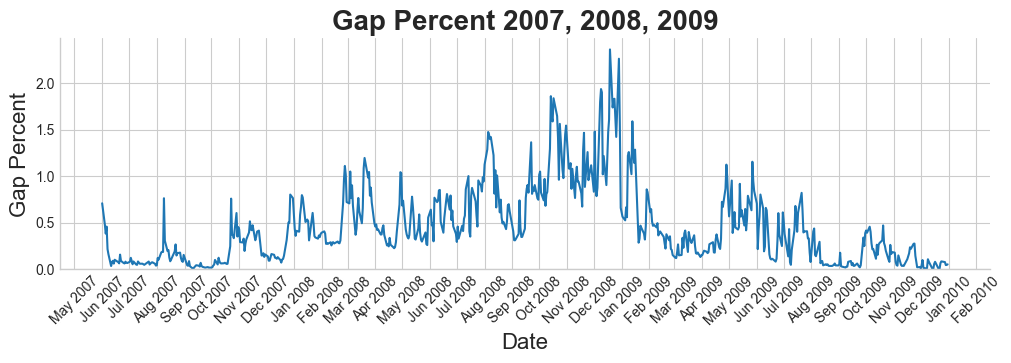

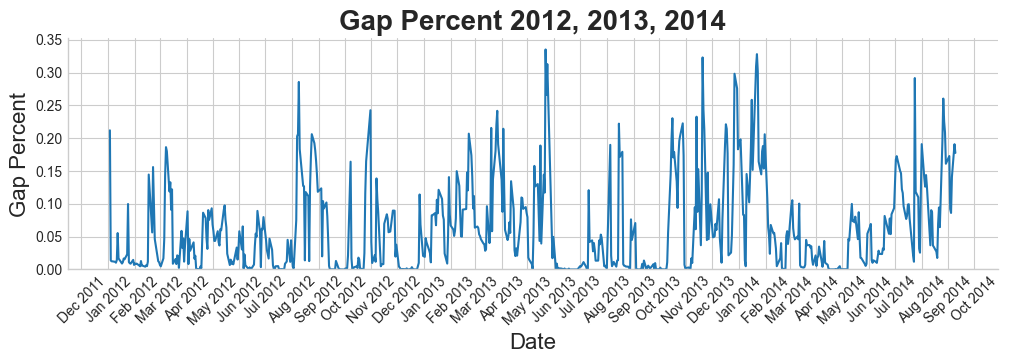

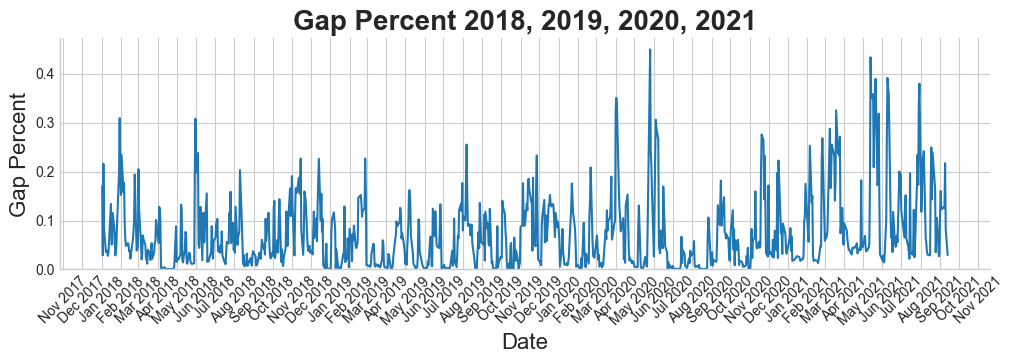

In [183]:
gap_plot(data_dict, ['2007','2008', '2009'])
gap_plot(data_dict, ['2012','2013', '2014'])
gap_plot(data_dict, ['2018','2019', '2020', '2021'])


In [184]:
for year, data in data_dict.items():
    gp = data['gap_pct']
    print(f'{year}, {gp.mean():.2f}, {gp.max():.2f}, {gp.std():.2f}')

2007, 0.17, 0.80, 0.17
2008, 0.76, 2.36, 0.42
2009, 0.32, 1.59, 0.29
2012, 0.04, 0.29, 0.05
2013, 0.07, 0.34, 0.07
2014, 0.07, 0.33, 0.07
2018, 0.07, 0.31, 0.06
2019, 0.06, 0.26, 0.05
2020, 0.06, 0.45, 0.07
2021, 0.12, 0.43, 0.10


dict_keys(['2012'])


Text(0.5, 1.0, 'Gap Percent 2012 med ESG og Sector Constraints')

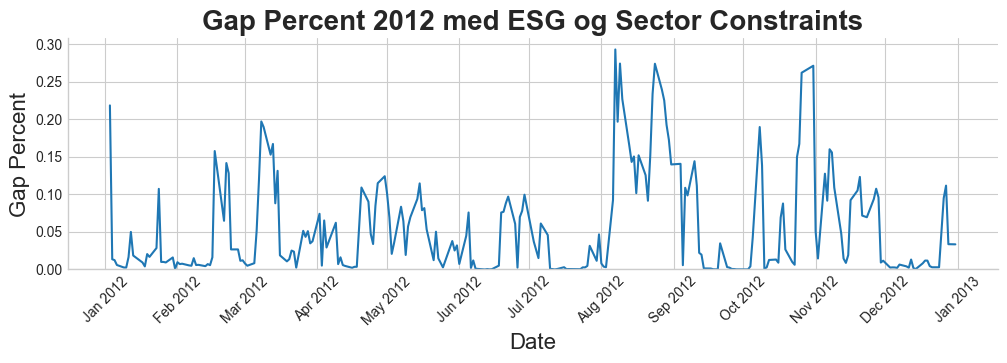

In [161]:
sector = ['backtest_2012_cap_025_all_days.npz', "backtest_2012_all_days.npz"]
back_dict = {}
read_data(sector[0], back_dict)
print(back_dict.keys())
fig, ax = gap_plot(back_dict, ['2012'])
ax.set_title('Gap Percent 2012 med ESG og Sector Constraints', fontsize=20, fontweight="bold")


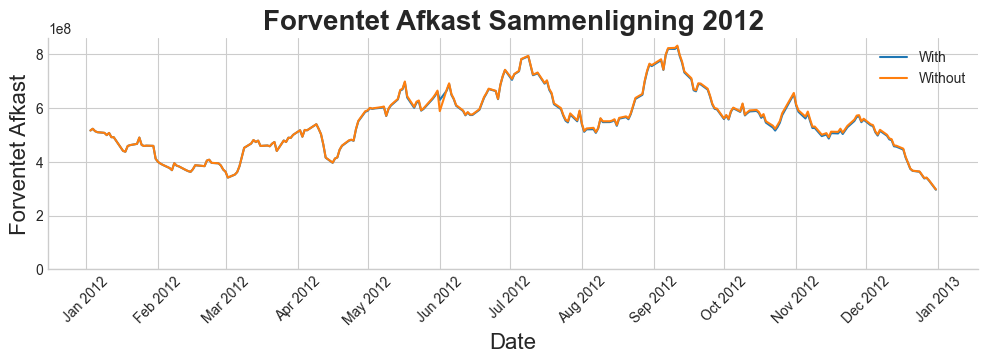

In [164]:
file_name = sector[0]

def print_cmp():
    labels = ['With', 'Without']
    fig, ax = plt.subplots(1,1, figsize=(12, 3))
    for lab, file in zip(labels, [back_dict['2012'], data_dict['2012']]):
        dates = file["dates"]
        expected_profit = file["expected_profit"]
        expected_profit_full = file["expected_profit_full"]
        year = file_name.split('_')[1]
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.xticks(rotation=45)
        ax.set_ylabel("Forventet Afkast", fontsize=16)
        ax.set_xlabel("Date", fontsize=16)
        #ax[0].plot(gap_pct, label=lab)
        ax.plot(dates, expected_profit,label=lab)
        #ax[0].set_title('Gap Percent')
    nice_plot(ax)
    ax.set_title('Forventet Afkast Sammenligning 2012', fontsize=20, fontweight="bold")
    ax.legend()
print_cmp()

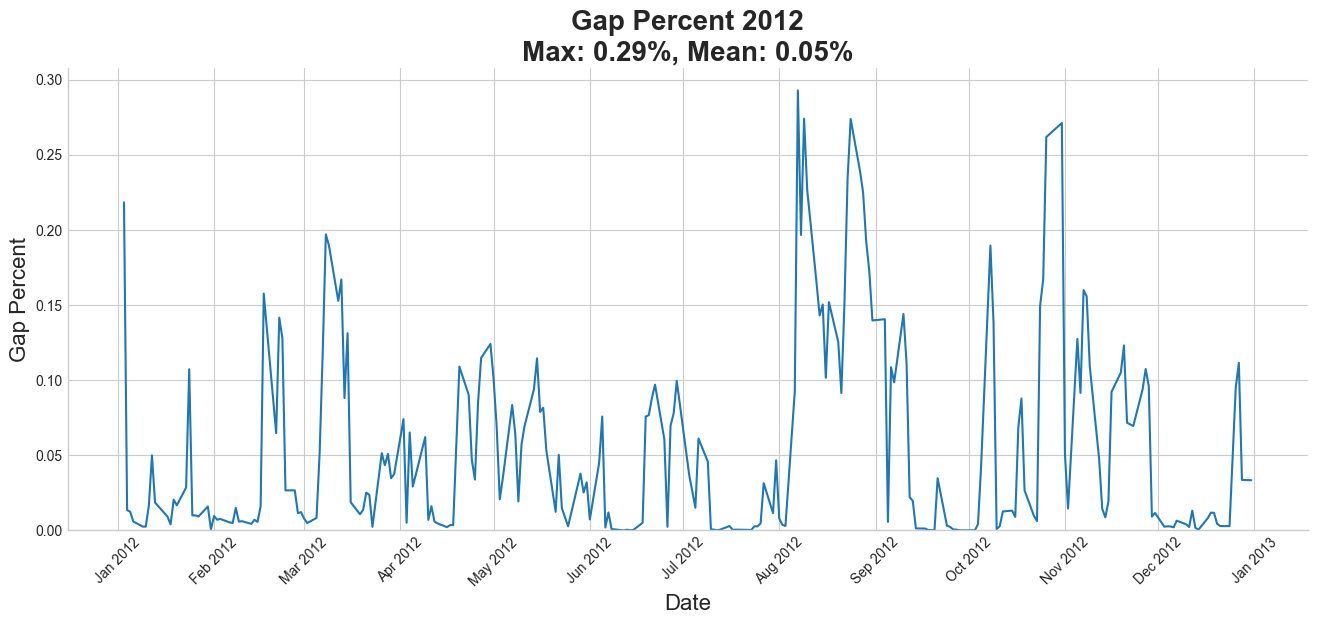

In [68]:
for f in sorted(sector):
    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    gap_plot(f, ax)

In [173]:
time_data_12 = np.loadtxt('runtimes_2012.txt')
time_data_18 = np.loadtxt('runtimes_2018.txt')
ic(time_data_12.shape, time_data_18.shape)
print(f'{time_data_12.mean():.2f}, {time_data_12.min():.2f}, {time_data_12.max():.2f}, {time_data_12.std():.2f}')
print(f'{time_data_18.mean():.2f}, {time_data_18.min():.2f}, {time_data_18.max():.2f}, {time_data_18.std():.2f}')

ic| time_data_12.shape: (569,), time_data_18.shape: (891,)


327.39, 275.38, 365.47, 11.84
208.44, 158.13, 275.53, 29.37


In [186]:
eqw_files = ['backtest_eqw_months.npz', 'backtest_mw_months.npz']
eqw_dict = {}
for fname in eqw_files:
    read_data(fname, eqw_dict)
    read_data(fname, eqw_dict)
ic(eqw_dict.keys())
#gap_plot(data_dict, ['2007','2008', '2009'])

ic| eqw_dict.keys(): dict_keys(['eqw', 'mw'])


dict_keys(['eqw', 'mw'])

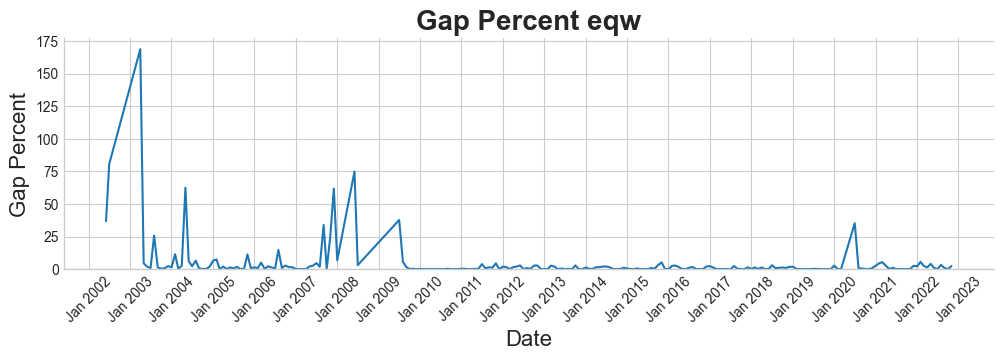

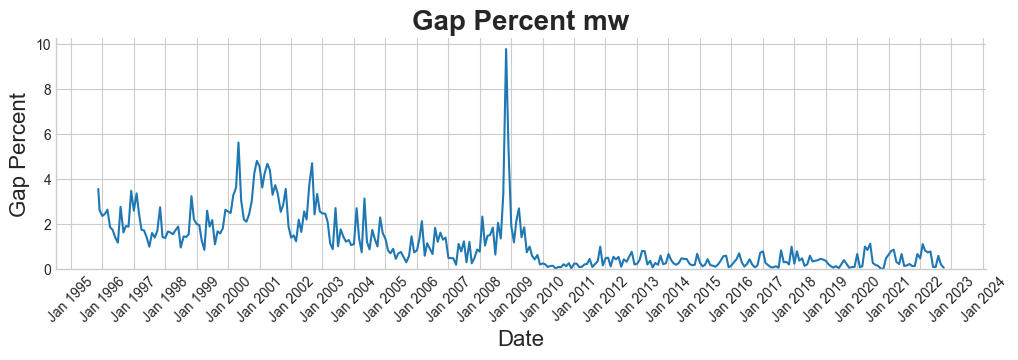

In [191]:
fig, ax = gap_plot(eqw_dict, ['eqw'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#ax.xticks(rotation=45)
fig, ax = gap_plot(eqw_dict, ['mw'])
ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


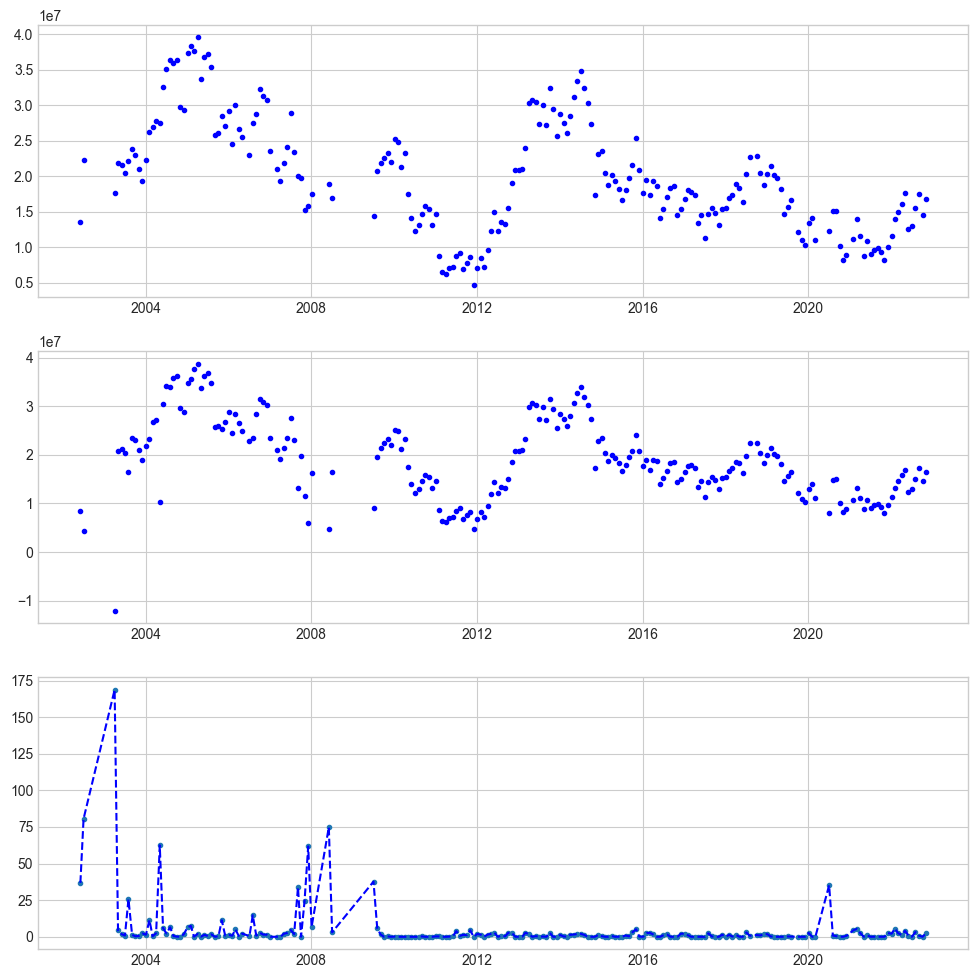

In [202]:
de = eqw_dict['eqw']
fig,ax = plt.subplots(3, 1, figsize=(12,12))
ax[0].plot(de['dates'], de['expected_profit_full'],'b.')
ax[1].plot(de['dates'], de['expected_profit'],'b.')
ax[2].plot(de['dates'], de['gap_pct'],'.')
ax[2].plot(de['dates'], de['gap_pct'],'b--')

#print(de['dates'])

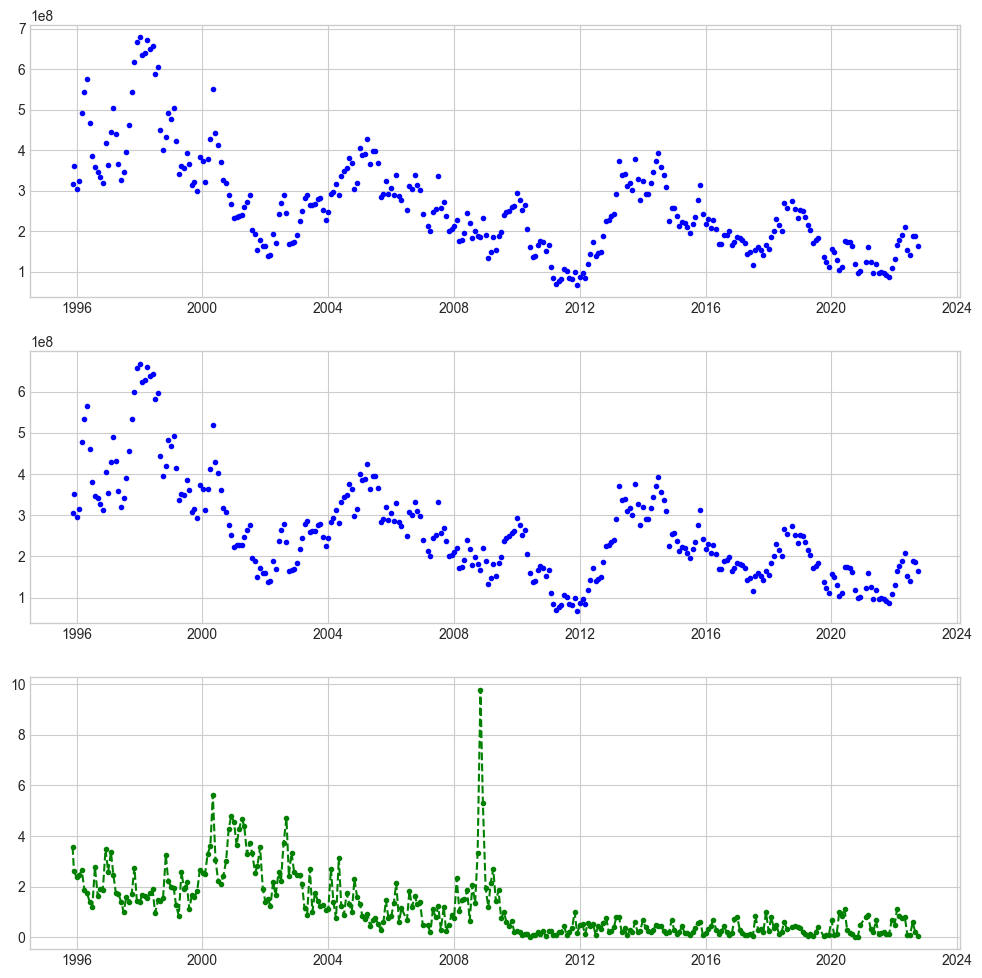

In [210]:
import datetime
de = eqw_dict['mw']
fig,ax = plt.subplots(3, 1, figsize=(12,12))
filt = np.array(de['dates']) > datetime.datetime(year=2005,month=1, day=1)
dates = np.array(de['dates'])[filt]
gaps = np.array(de['gap_pct'][filt]
ax[0].plot(de['dates'], de['expected_profit_full'],'b.')
ax[1].plot(de['dates'], de['expected_profit'],'b.')
ax[2].plot(de['dates'], de['gap_pct'],'g.')
ax[2].plot(de['dates'], de['gap_pct'],'g--')

#print(de['dates'])

(array([12418., 12784., 13149., 13514., 13879., 14245., 14610., 14975.,
        15340., 15706., 16071., 16436., 16801., 17167., 17532., 17897.,
        18262., 18628., 18993., 19358.]),
 [Text(12418.0, 0, 'Jan 2004'),
  Text(12784.0, 0, 'Jan 2005'),
  Text(13149.0, 0, 'Jan 2006'),
  Text(13514.0, 0, 'Jan 2007'),
  Text(13879.0, 0, 'Jan 2008'),
  Text(14245.0, 0, 'Jan 2009'),
  Text(14610.0, 0, 'Jan 2010'),
  Text(14975.0, 0, 'Jan 2011'),
  Text(15340.0, 0, 'Jan 2012'),
  Text(15706.0, 0, 'Jan 2013'),
  Text(16071.0, 0, 'Jan 2014'),
  Text(16436.0, 0, 'Jan 2015'),
  Text(16801.0, 0, 'Jan 2016'),
  Text(17167.0, 0, 'Jan 2017'),
  Text(17532.0, 0, 'Jan 2018'),
  Text(17897.0, 0, 'Jan 2019'),
  Text(18262.0, 0, 'Jan 2020'),
  Text(18628.0, 0, 'Jan 2021'),
  Text(18993.0, 0, 'Jan 2022'),
  Text(19358.0, 0, 'Jan 2023')])

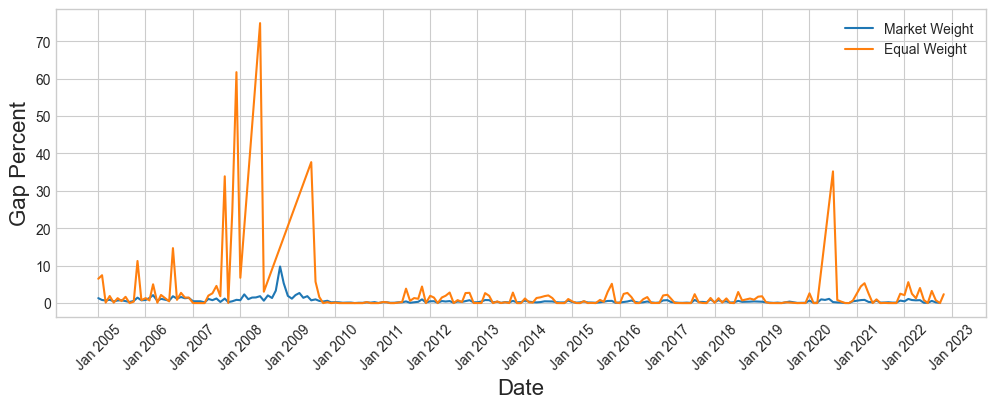

In [225]:
de = eqw_dict['mw']
fig,ax = plt.subplots(1, 1, figsize=(12,4))
def plot_from5(de, ax, label):
    filt = np.array(de['dates']) > datetime.datetime(year=2005,month=1, day=1)
    dates = np.array(de['dates'])[filt]
    gaps = np.array(de['gap_pct'])[filt]
    ax.plot(dates, gaps, label=label)
plot_from5(eqw_dict['mw'], ax, 'Market Weight')
plot_from5(eqw_dict['eqw'], ax, 'Equal Weight')
ax.legend()
ax.set_ylabel('Gap Percent', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#ax.set_ylim([0,40])
plt.xticks(rotation=45)


In [227]:
from scipy.special import comb

# Calculate "1200 choose 160"
n = 1200
k = 160
result = comb(n, k)
print(result)

1.49045323736717e+203


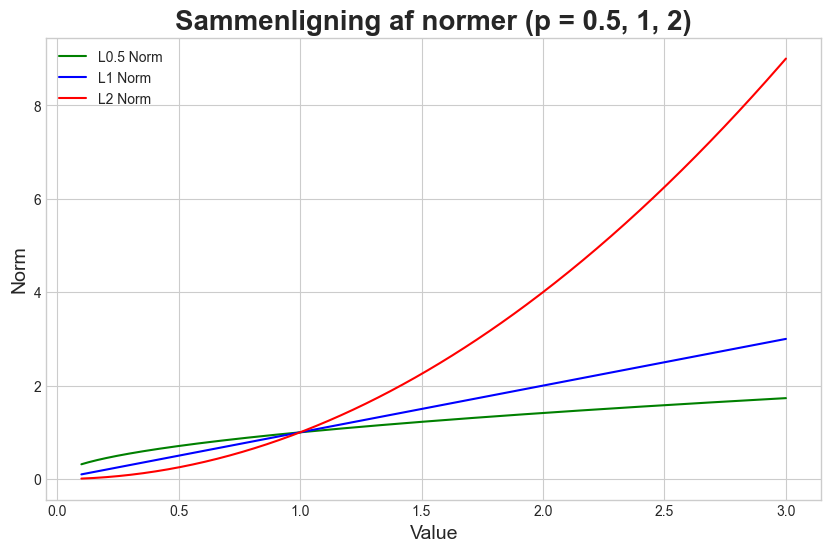

In [234]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of positive values
x = np.linspace(0.1, 3, 400)

# Compute the Lp norms
l0_5_norm = x**0.5
l1_norm = x
l2_norm = x**2

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, l0_5_norm, label='L0.5 Norm', color='green')
plt.plot(x, l1_norm, label='L1 Norm', color='blue')
plt.plot(x, l2_norm, label='L2 Norm', color='red')

# Adding titles and labels
plt.title('Sammenligning af normer (p = 0.5, 1, 2)',  fontsize=20, fontweight="bold")
plt.xlabel('Value', fontsize=14)
plt.ylabel('Norm', fontsize=14)

# Adding a legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

